In [34]:
# Importing libraries and reading csv file

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

df = pd.read_csv('train.csv')

print(df.columns)

print(df.head(10))

print(df['Name'].head(10))

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.

In [35]:
len(df.loc[df['Survived'] == 1])

342

In [36]:
len(df.loc[df['Survived'] == 0])

549

In [37]:
len(df.loc[(df['Sex'] == 'female') & (df['Survived'] == 1)])

233

In [38]:
len(df.loc[(df['Sex'] == 'female') & (df['Survived'] == 0)])

81

In [39]:
len(df.loc[(df['Sex'] == 'male') & (df['Survived'] == 1)])

109

In [40]:
len(df.loc[(df['Sex'] == 'male') & (df['Survived'] == 0)])

468

In [41]:
df.loc[(df['Sex'] == 'female') & (df['Age'] >= 55.0)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S
195,196,1,1,"Lurette, Miss. Elise",female,58.0,0,0,PC 17569,146.5208,B80,C
268,269,1,1,"Graham, Mrs. William Thompson (Edith Junkins)",female,58.0,0,1,PC 17582,153.4625,C125,S
275,276,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S
366,367,1,1,"Warren, Mrs. Frank Manley (Anna Sophia Atkinson)",female,60.0,1,0,110813,75.2500,D37,C
483,484,1,3,"Turkula, Mrs. (Hedwig)",female,63.0,0,0,4134,9.5875,NaN,S
772,773,0,2,"Mack, Mrs. (Mary)",female,57.0,0,0,S.O./P.P. 3,10.5000,E77,S
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0000,B28,NaN
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C


In [42]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [43]:
df['Age'].mean()

29.69911764705882

In [44]:
# Filling NaN values with random values -+5 around the mean and observing changes

df['Age'].fillna((np.random.rand() * 5) + df['Age'].mean(), inplace = True)

In [45]:
df['Age'].mean()

29.742565068003227

In [46]:
# Dropping unnecessary columns

df = df.drop(columns = ['Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked'])

In [47]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

In [48]:
df.sort_values('Age')

,PassengerId,Survived,Pclass,Sex,Age,Fare
803,804,1,3,0,0.42,8.5167
755,756,1,2,0,0.67,14.5000
644,645,1,3,1,0.75,19.2583
469,470,1,3,1,0.75,19.2583
831,832,1,2,0,0.83,18.7500
...,...,...,...,...,...,...
116,117,0,3,0,70.50,7.7500
96,97,0,1,0,71.00,34.6542
493,494,0,1,0,71.00,49.5042
851,852,0,3,0,74.00,7.7750


In [49]:
# Checking for duplicates

df.loc[df.duplicated(), :]

,PassengerId,Survived,Pclass,Sex,Age,Fare


<Axes: >

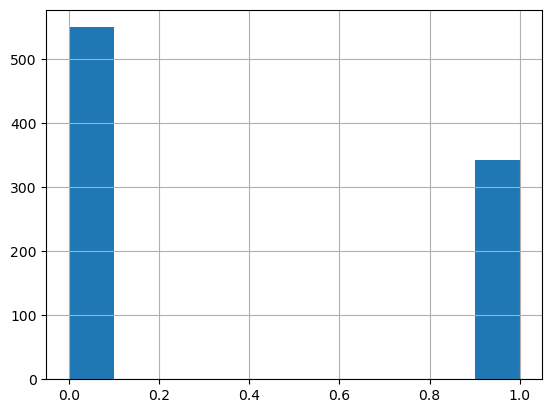

In [50]:
df['Survived'].hist()

<Axes: >

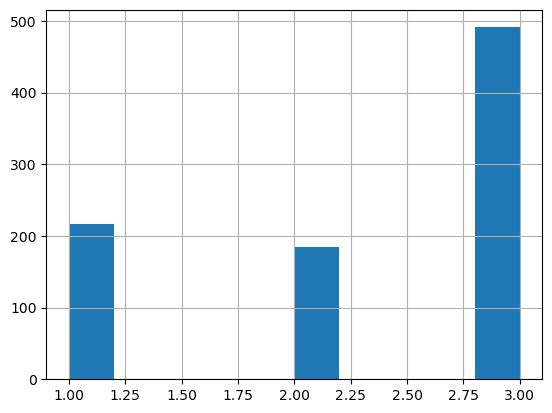

In [51]:
df['Pclass'].hist()

<Axes: >

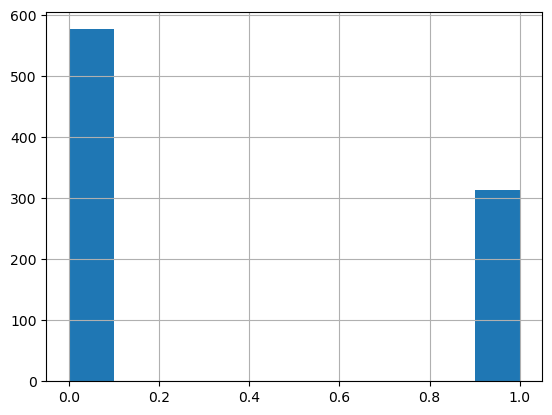

In [52]:
df['Sex'].hist()

<Axes: >

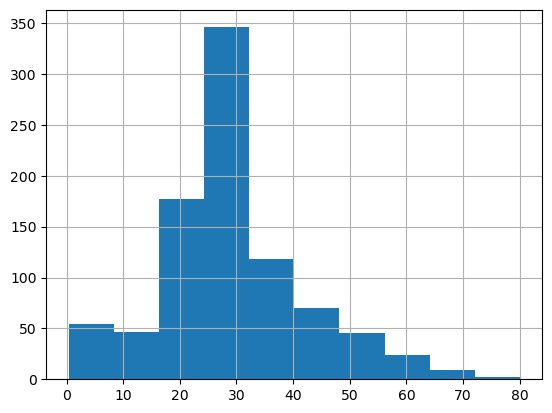

In [53]:
df['Age'].hist()

<Axes: >

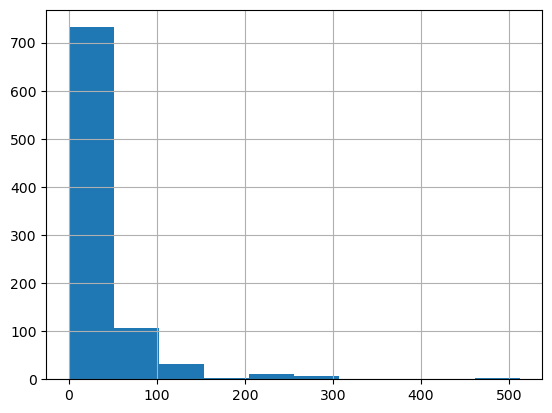

In [54]:
df['Fare'].hist()

<Axes: >

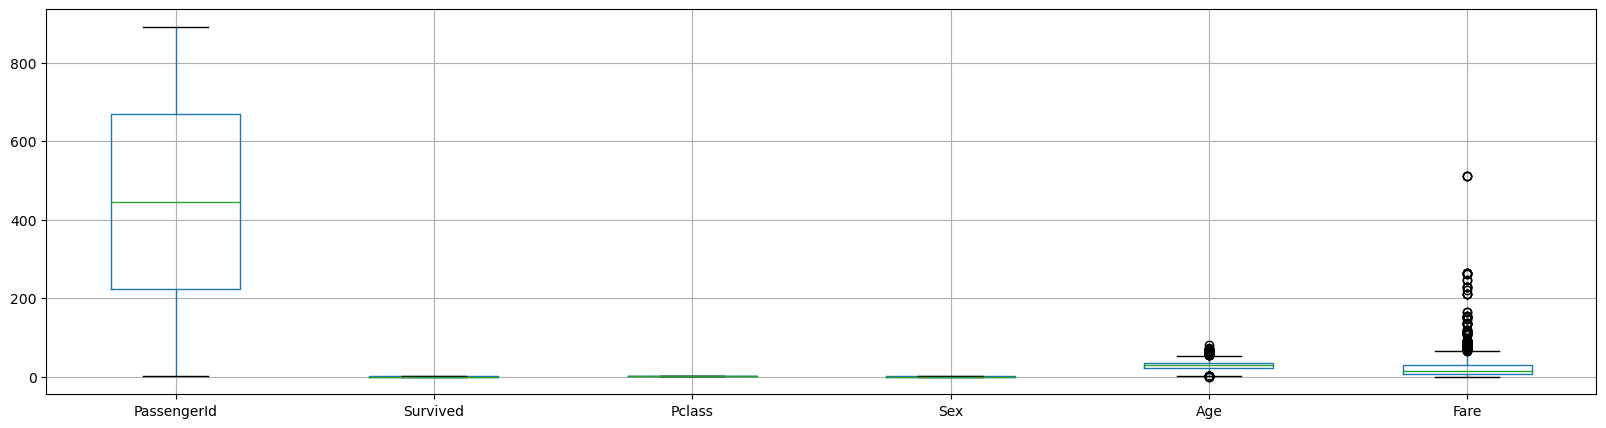

In [55]:
df.boxplot(figsize = (20, 5))

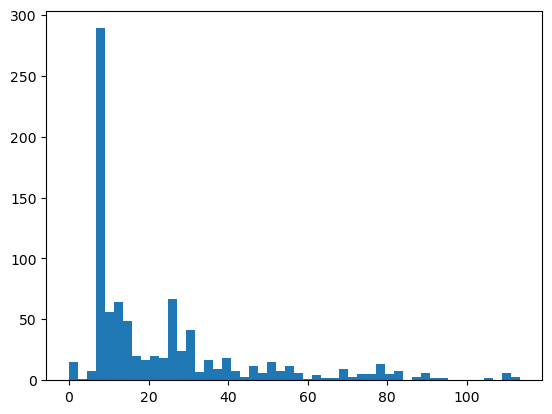

In [56]:
# Observing outliers and removing them

pd.options.mode.chained_assignment = None

u = np.median(df['Fare'])
s = np.std(df['Fare'])

for i in range(len(df['Fare'])):
    if not (u - 2 * s < df['Fare'][i] < u + 2 * s):
        df['Fare'][i] = np.random.rand() * 25 + df['Fare'].mean()

plt.hist(df['Fare'], 50)
plt.show()

<Axes: >

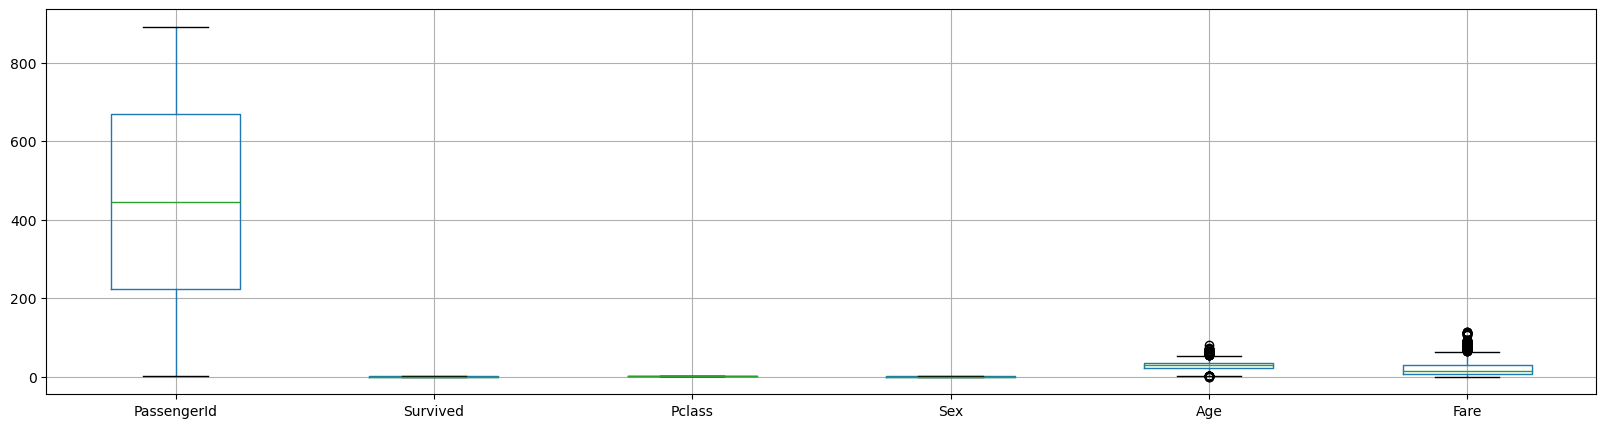

In [57]:
df.boxplot(figsize = (20, 5))

<Axes: ylabel='Frequency'>

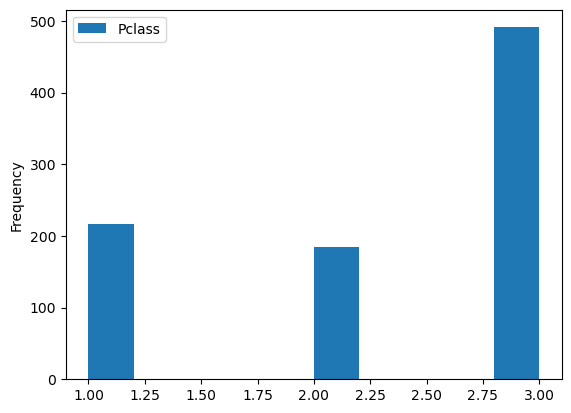

In [58]:
df.plot.hist(x = 'Survived', y = 'Pclass')

<Axes: xlabel='Age', ylabel='Fare'>

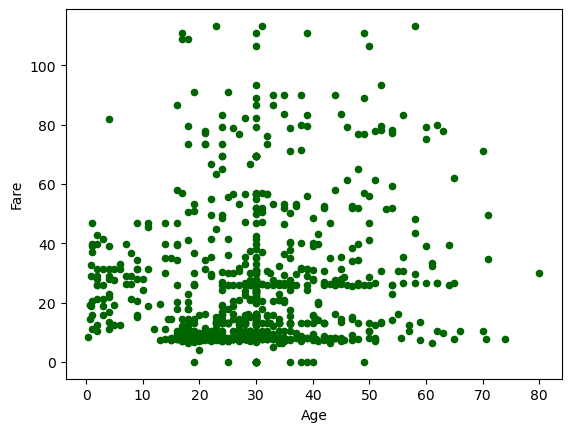

In [59]:
df.plot.scatter(x = 'Age', y = 'Fare', c = 'darkgreen')

In [60]:
df_test = pd.read_csv('test.csv')
df_gender = pd.read_csv('gender_submission.csv')

In [61]:
df_test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [62]:
df_test = df_test.drop(columns = ['Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked'])
df_test['Age'].fillna((np.random.rand() * 5) + df_test['Age'].mean(), inplace = True)
df_test = df_test.dropna()
df_test['Sex'] = df_test['Sex'].map({'male': 0, 'female': 1})

In [63]:
df_gender.isna().sum()

PassengerId    0
Survived       0
dtype: int64

In [64]:
# Training data set

X = df.copy()
y = X.pop('Survived')
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 100)

In [65]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [66]:
# Predicting and calculating the accuracy

predictions = clf.predict(X_test)
print(accuracy_score(y_test, predictions))

0.7174887892376681
